<a href="https://colab.research.google.com/github/Terisha24/Data-Analysis-Dashboard/blob/main/Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

In [5]:
path= "/content/drive/MyDrive/Stroke data set project/healthcare-dataset-stroke-data.csv"
df=pd.read_csv(path)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
# Basic cleanup
df = df.drop('id', axis=1)  # drop irrelevant ID
df = df[df.gender != 'Other']  # drop rare 'Other' gender

# Handle missing values
df['bmi'].fillna(df['bmi'].median(), inplace=True)

# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Investigate class imbalance
df['stroke'].value_counts(normalize=True)


/tmp/ipython-input-6-3561431148.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


,proportion
stroke,
0,0.951262
1,0.048738


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

X = df.drop('stroke', axis=1)
y = df['stroke']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Optional: Balance the training set with SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# Fit the model
model = LogisticRegression(max_iter=1000)
model.fit(X_res, y_res)  # or use X_train, y_train if no resampling


LogisticRegression(max_iter=1000)

[[829 143]
 [ 29  21]]
              precision    recall  f1-score   support

           0       0.97      0.85      0.91       972
           1       0.13      0.42      0.20        50

    accuracy                           0.83      1022
   macro avg       0.55      0.64      0.55      1022
weighted avg       0.93      0.83      0.87      1022

AUC: 0.7768930041152263


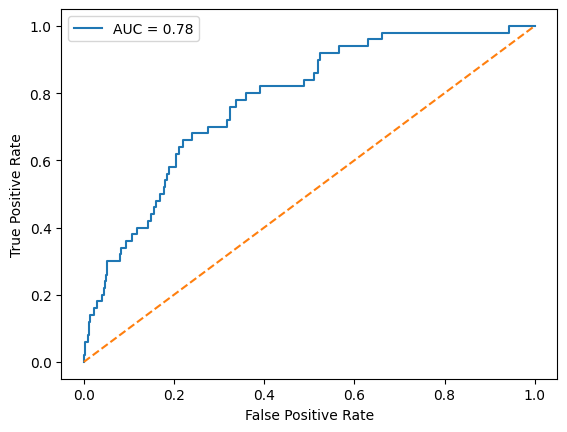

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('AUC:', roc_auc_score(y_test, y_proba))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


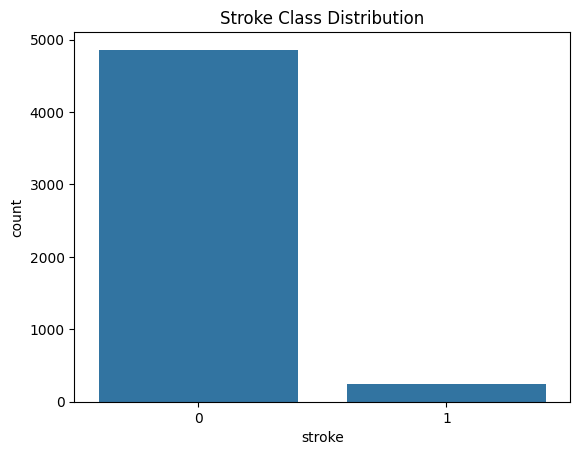

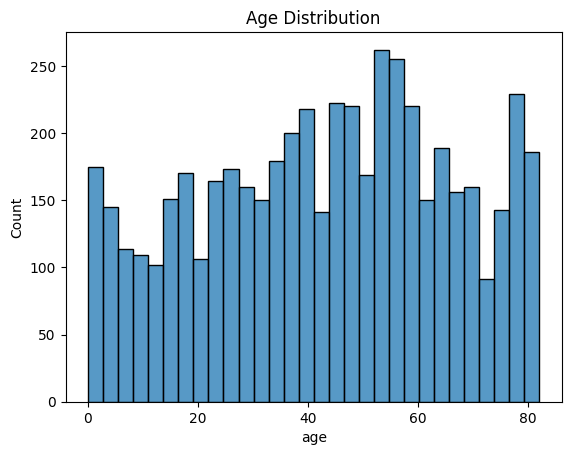

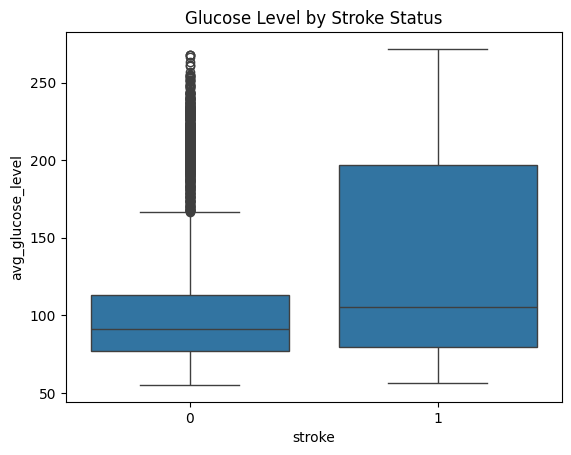

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of stroke
sns.countplot(x='stroke', data=df)
plt.title('Stroke Class Distribution')
plt.show()

# Age distribution
sns.histplot(df['age'], bins=30)
plt.title('Age Distribution')
plt.show()

# Glucose level vs stroke
sns.boxplot(x='stroke', y='avg_glucose_level', data=df)
plt.title('Glucose Level by Stroke Status')
plt.show()
